In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
# Set Eager API (without requiring a Session.run() )
tfe.enable_eager_execution()

In [4]:
#Training data
x_train = np.array(np.random.uniform(low=-1.0,high=1.0,size=20))
y_train = np.array(np.random.uniform(low=-1.0,high=1.0,size=20))
n_samples = len(x_train)
n_samples

20

In [5]:
#Parameters
learning_rate = 0.01
display_step = 50
num_steps = 1000

In [6]:
#Weight and bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

#Linear Regression
def linear_regression(inputs):
    return inputs * W + b

#Calculate mean squared error
def mean_square_error_function(model_function, inputs, labels):
    return tf.reduce_sum(tf.pow(model_function(inputs) - labels, 2)) / (2*n_samples)

In [7]:
#SGD optimizer
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

#Compute gradient
grad = tfe.implicit_gradients(mean_square_error_function)

Initial cost= 0.333214223 W=  0.059732128 b=  0.47989875
Epoch: 0001 cost= 0.330919445 W=  0.058756314 b=  0.47519684
Epoch: 0050 cost= 0.259237170 W=  0.015085576 b=  0.2943093
Epoch: 0100 cost= 0.230927423 W=  -0.022265332 b=  0.18224855
Epoch: 0150 cost= 0.219656467 W=  -0.053730465 b=  0.1146375
Epoch: 0200 cost= 0.214861587 W=  -0.080372296 b=  0.07388984
Epoch: 0250 cost= 0.212613776 W=  -0.10301337 b=  0.049370866
Epoch: 0300 cost= 0.211428493 W=  -0.12230534 b=  0.03465041
Epoch: 0350 cost= 0.210727975 W=  -0.13877481 b=  0.025841422
Epoch: 0400 cost= 0.210275367 W=  -0.15285356 b=  0.02059478
Epoch: 0450 cost= 0.209965378 W=  -0.16490015 b=  0.017491387
Epoch: 0500 cost= 0.209745765 W=  -0.17521499 b=  0.01567447
Epoch: 0550 cost= 0.209587291 W=  -0.18405117 b=  0.01462717
Epoch: 0600 cost= 0.209471866 W=  -0.19162323 b=  0.014038054
Epoch: 0650 cost= 0.209387377 W=  -0.19811358 b=  0.0137197785
Epoch: 0700 cost= 0.209325358 W=  -0.20367761 b=  0.013559917
Epoch: 0750 cost= 0.

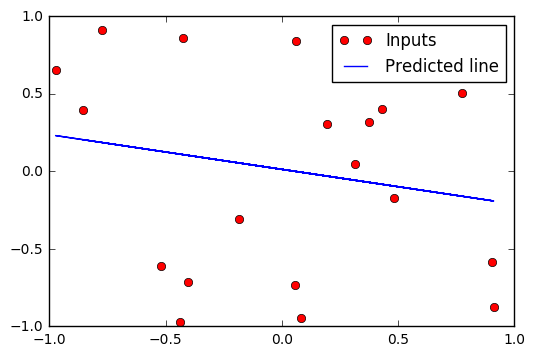

In [8]:
print('Initial cost= {:.9f}'.format(mean_square_error_function(linear_regression, x_train, y_train)), 'W= ', W.numpy(), 'b= ', b.numpy())

#Training
for step in range(num_steps):
    my_optimizer.apply_gradients(grad(linear_regression, x_train, y_train))
    
    if (step+1) % display_step == 0 or step == 0:
        print('Epoch: %04d' % (step+1), 'cost= {:.9f}'.format(mean_square_error_function(linear_regression, x_train, y_train)),
             'W= ', W.numpy(), 'b= ', b.numpy())
        
#Plot display
plt.plot(x_train, y_train, 'ro', label='Inputs')
plt.plot(x_train, np.array(W*x_train+b), label='Predicted line')
plt.legend()
plt.show()